# Introduction  01_FPHDP_SimpleImputer_LR

I chose Heart Disease Prediction Database from Kaggle because it is a popular dataset. I understand that Pipeline is effective for doing preprocessing while preventing data leakage. The steps below in this example show my efforts to use Sci-kit Learns ColumnTransformer for mixed datatypes.
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#

Kaggle Coder Acknowledgements in data evaluation:
Mehrdad Sadeghi: https://www.kaggle.com/code/mehrdadsadeghi/heart-failure-prediction-eda-5-models-cv-score


**Appendix B: page 758**

### Import Libraries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


np.random.seed(42)

In [ ]:
#Pandas dataframe
heart = pd.read_csv("heart.csv")

**Data Exploration**
It's good practice to get a general understanding of the data, split the data into training set and test sets, then explore the training set further.

In [ ]:
# alternatively heart.head(5)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# evaluating datatypes so I can use ColumnTransformer
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


918 instances and none have missing values.

Type object could hold any Python object. We loaded a CSV, so non-numbers must be text.



In [ ]:
#https://www.youtube.com/watch?v=JR92LxKgMBE
numeric_features = heart.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [ ]:
categorical_features = heart.select_dtypes(include=[object])
categorical_features.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
# min reveals problematic data in RestingBP, Cholesterol

# Standard deviation (or σ) is a measure of how dispersed the data is in
# relation to the mean. Low standard deviation means data are clustered around
# the mean, and high standard deviation indicates data are more spread out.
# Standard deviation is denoted with the greek letter sigma, and it is the
# square root of the variance, which is the average of the squared deviation
# from the mean.

# Percentile indicates the value below which a given percentage of observations
# in a group of observations falls. For example, agewise: 25% are under 47;
# 50% are under 54; 75% are under 60.

heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# We can find out what categories exist and how many instances belong to each category.
#heart[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ]].value_counts()

We plot histograms for each numerical attribute. Instances on vertical axis and their given value range on the horizontal axis.

These histograms show the raw data, i.e. no preprocessing on it yet.

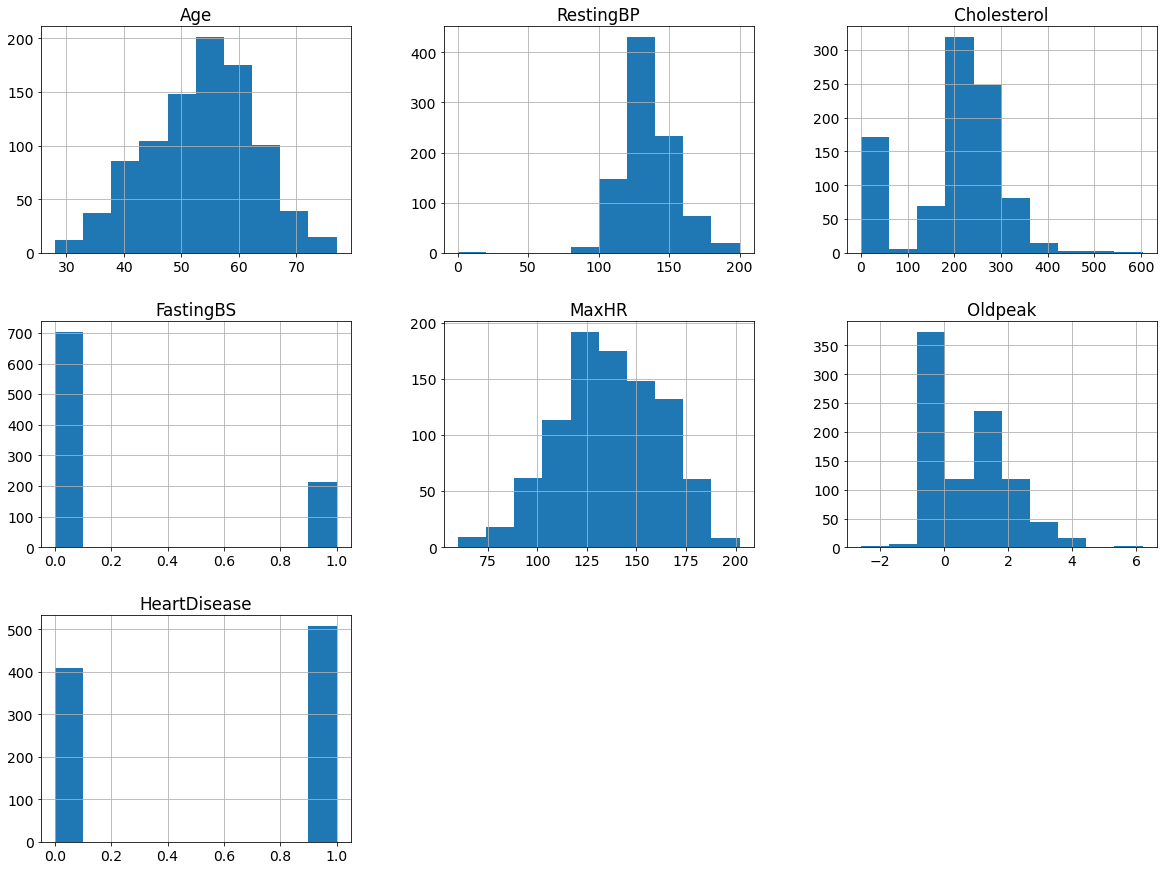

In [ ]:
# checking for Gaussian (normal, or bell-shaped, where 68% are w/in 1σ of the
# mean, 95% w/in 2σ, 99.7% w/in 3σ) distribution in numeric features Age,
# RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak
# Resting BP and cholesterol may have abnormal values.
# according to https://www.healthline.com/health/serum-cholesterol#results
# healthy serum cholesterol	less than 200 mg/dL
heart.hist(bins = 10, figsize =(20, 15))
plt.show()

The histogram of HeartDisease is more important than I had previously realized in terms of how we set up our train_test_split in terms of balanced target values.

In [ ]:
heart["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
correlation  = numeric_features.corr()
print(correlation['HeartDisease'].sort_values(ascending = False), '\n')

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64 



In [ ]:
#now we can do a heatmap
# f, ax = plt.subplots(figsize = (14, 12))
# plt.title('Correlation of Numeric features with Heart Disease', y = 1, size=16)
# sns.heatmap(correlation, square = True, vmax=0.8)

In [ ]:
# We want to remove multicollinearity: when two features are highly correlated
# with a target variable and highly correlated within themselves also. Those
# kind of features destroys the model performance because of very low variance.
# For any two features with a high correlation value, I could keep the feature
# with the higher correlation value out of the two.)
# https://www.youtube.com/watch?v=JR92LxKgMBE
# k=7
# cols = correlation.nlargest(k, 'HeartDisease')['HeartDisease'].index
# print(cols)
# cm = np.corrcoef(heart[cols].values.T)
# f , ax = plt.subplots(figsize = (14, 12))
# sns.heatmap(cm, vmax=.8, linewidth=0.01, square=True, annot=True, cmap='viridis', linecolor='white', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

#end: https://www.youtube.com/watch?v=JR92LxKgMBE

In [ ]:
corr_matrix = heart.corr()

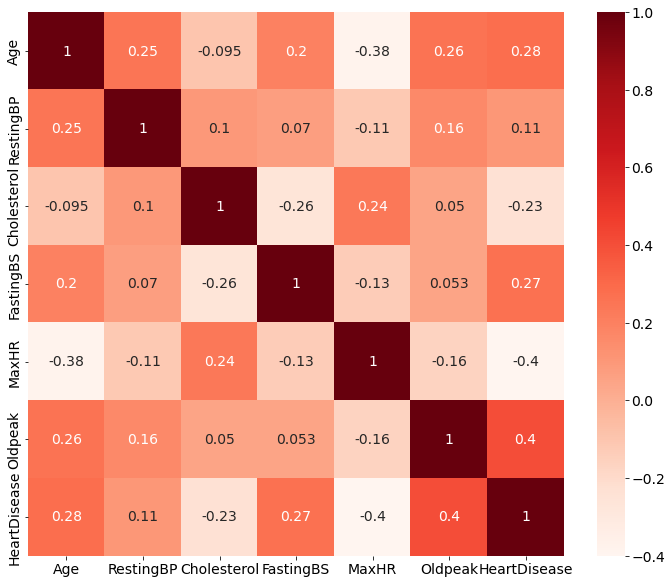

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(heart.corr(), annot=True, cmap='Reds')
plt.show()

In [ ]:
# An alternative way to evaluate numerical correlation.
#corr_matrix['HeartDisease'].sort_values(ascending=False)

In [ ]:
heart.shape

(918, 12)

resting blood pressure [mm Hg]

serum cholesterol [mm/dl]

fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

maximum heart rate achieved [Numeric value between 60 and 202]

oldpeak = ST [Numeric value measured in depression]



**Frequencies** for Categorical features Sex, ChestPainType, Resting ECG, ST_Slope



In [ ]:
# #define crosstab
tab = pd.crosstab(index=heart['Sex'], columns='frequency')

# #find proportions
tab/tab.sum()


col_0,frequency
Sex,
F,0.21024
M,0.78976


In [ ]:
#define crosstab
tab = pd.crosstab(index = heart['ChestPainType'], columns = 'count')

#find proportions
tab/tab.sum()


col_0,count
ChestPainType,
ASY,0.540305
ATA,0.188453
NAP,0.221133
TA,0.050109


ASY: Asymptomatic

ATA: Atypical Angina

NAP: Non-Anginal Pain

TA: Typical Angina

In [ ]:
#define crosstab
tab = pd.crosstab(index = heart['RestingECG'], columns = 'count')

#find proportions
tab/tab.sum()

col_0,count
RestingECG,
LVH,0.204793
Normal,0.601307
ST,0.193900


Resting Electrocardiogram Results

LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

Normal: Normal

ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)



In [ ]:
#define crosstab
tab = pd.crosstab(index = heart['ST_Slope'], columns = 'count')

#find proportions
tab/tab.sum()

col_0,count
ST_Slope,
Down,0.068627
Flat,0.501089
Up,0.430283


The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

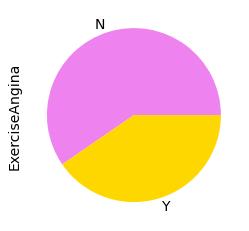

In [ ]:
#heart.groupby('ExerciseAngina').size().plot(kind='pie', autopct='%.2f')
heart['ExerciseAngina'].value_counts().plot(kind='pie', colors=['violet', 'gold'])

In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# detect missing values; get sum of missing values per column.
#heart.isna().sum()

In [ ]:
#X = heart.loc[:, :'ST_Slope']
X= heart.drop('HeartDisease', axis=1)
#y = heart.HeartDisease
y = heart['HeartDisease']

In [ ]:
X.shape


(918, 11)

In [ ]:
y.shape

(918,)

In [ ]:
# Verifying X has the features I expect
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

"Here I apply a preprocessing and feature extraction pipeline to different subsets of features, using ColumnTransformer. This is particularly handy for the case of datasets that contain heterogeneous data types, since we may want to scale the numeric features and one-hot encode the categorical ones."
In this example, the numeric data is standard-scaled after mean-imputation, while the categorical data is one-hot encoded after imputing missing values with a new category ('missing'). **(Note heart.csv does not have any missing values)** We dispatch the columns to the pre-processor by column names (you could also do it by column data types). Finally, the preprocessing pipeline is integrated in a full prediction pipeline using Pipeline, together with a simple classification model.

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#

**Task: Predict Class Heart Disease**
Supervised learning because our training examples come with expected output.
Classification task since we are classifying the case of heart disease or not.



**MODEL 1: Pipeline using ColumnTransformer and Logistic Regression**
Logistic Regression can be used for classification. It estimates the probability that an instance belongs to a particular class. Positive class = 1 and negative class = 0. A binary classifier.

The logistic is a sigmoid function that outputs a number between 0 and 1.

$σ(t) = \frac{1}{1+e^{-t}}$

Once the Logistic Regression model has estimated the probability of $\hat{p}=h_{\theta}(\textit x)$ that an instance x belongs to the positive class, it can make its prediction $\hat{y}$

$\hat{y}= \begin{cases} 0 \;if \;\; \hat{p} <0.5 \\ 1 \; if \; \hat{p} \geq 0.5 \\ \end{cases}$


The cost function over the whole training set is the average cost over all training instances. The Logisitc Regression cost function, called log loss, is convex, so Gradient Descent is guaranteed to find the global minimum.

$J(𝚯)=\frac{-1}{m}\sum_{i=1}^{m}[y^ilog(\hat{p}^i) +(1-y^i)log(1-\hat{p}^i]$

The cost function of a single training instance:

$c(𝚯) = \begin{cases} \; -log(\hat{p}) \;\;\;\;\;\;\; if \; \;\; y = 1 \\ \; -log(1-\hat{p}) \; if \;\; y = 0 \end{cases}$


Note: Missing values can be replaced by the mean, the median or the most frequent value using the basic SimpleImputer.

In [ ]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have balanced response values within test set and
# training set.
# another resource on stratify y from Data School:
# https://www.youtube.com/watch?v=Zcjl8xPLmPw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

clf.fit(X_train, y_train)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data :", training_data_accuracy)


print("model score on test set: %.3f" % clf.score(X_test, y_test))

Accuracy on training data : 0.8596730245231607
model score on test set: 0.886


Since the accuracy scores on the training data and the test set are relatively close I am not concerned about overfitting, especially since the test set accuracy is higher than that of the training set.

'Grid search can also be performed on the different preprocessing steps defined in the ColumnTransformer object, together with the classifier's hyperparameters as part of the Pipeline. We will search for both the imputer strategy of the numeric preprocessing and the regularization parameter of the logistic regression using :class:~sklearn.model_selection.GridSearchCV.'

In [ ]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__C": [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                               

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}


'The internal cross-validation scores obtained by those parameters is:'

In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.855


'We can also introspect the top grid search results as a pandas dataframe:'

In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_classifier__C",
    ]
].head(8)

,mean_test_score,std_test_score,param_preprocessor__num__imputer__strategy,param_classifier__C
0,0.855424,0.036815,mean,0.1
1,0.855424,0.036815,median,0.1
2,0.848575,0.041378,mean,1.0
3,0.848575,0.041378,median,1.0
4,0.847223,0.038690,mean,10
5,0.847223,0.038690,median,10
6,0.847223,0.038690,mean,100
7,0.847223,0.038690,median,100


'The best hyper-parameters have been used to re-fit a final model on the full training set. We can evaluate that final model on held out test data that was not used for hyperparameter tuning.'

In [ ]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best logistic regression from grid search: 0.891


**https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py**

Above code and text can be found in the link to the Column Transformer example in Sci-Kit Learn.

In [ ]:
heartdisease_y_pred = clf.predict(X_test)
heartdisease_y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1])

The GridSearchCV object itself doesn't have a coefficient, because it's not an estimator, it's an object that cycles through parameters and trains various estimators.
https://stackoverflow.com/questions/62776587/python-gridsearchcv-object-has-no-attribute-coef

In [ ]:
y_test.shape



(184,)

In [ ]:
heartdisease_y_pred.shape

(184,)

In [ ]:
# Both arguments require the same number of samples
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, heartdisease_y_pred)

array([[68, 14],
       [ 7, 95]])

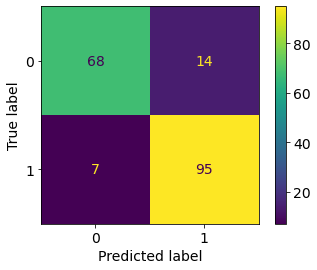

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, heartdisease_y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#TN | FP
#FN | TP

#Even though the L-to-R diagonal is high valued, is it acceptable to have 7
#false negatives when it means failure to diagnose a real case of heart disease?

The follow evaluation scores courtesy of Data School
https://www.youtube.com/watch?v=85dtiMz9tSo

Metrics I look at for this problem: high accuracy > high precision > high recall (TPR) and low FPR

How often is this classifier correct?


Classification accuracy = (TP + TN)/(TP + TN + FP + FN) = 163/184 = .885870



In [ ]:
accuracy_score(y_test, heartdisease_y_pred)

0.8858695652173914

Missclassificaton rate?

Classification error = (FP + FN)/(TP + TN + FP + FN) = 21/184 = .114130






In [ ]:
1-accuracy_score(y_test, heartdisease_y_pred)

0.11413043478260865

**Sensitivity**: when the actual value is positive, how often is the prediction correct? How sensitive is the classifier to detecting positive instances? **True Positive Rate** or **Recall**
TP / (TP + FN) = 95/102 = .931373

In [ ]:
recall_score(y_test, heartdisease_y_pred)

0.9313725490196079

**Specificity:**when the actual value is negative how often is the prediction correct? TN/(TN+FP) = 68/82 = .829268

False Positive Rate: when the actual value is negative, how often is the prediction incorrect? FP/(TN+FP) = 14/82 = .170731


**(1 - Specificity)**

How precise is the classifier when predicting a positive instance?

**Precision** when a positive value is predicted, how often is the prediciton correct? TP/TP + FP = 95/109 = .871560

In [ ]:
precision_score(y_test, heartdisease_y_pred)

0.8715596330275229

In [ ]:
#similar method for classification models outputs prediction probabilities of class membership
# row per instance, columns for class. Ours is binary, so two columns for 0,1 or
# - +
#look at first 9 rows and both classes 0, 1
clf.predict_proba(X_test)[:10, :]

array([[0.02040827, 0.97959173],
       [0.860508  , 0.139492  ],
       [0.03584605, 0.96415395],
       [0.43687362, 0.56312638],
       [0.84232082, 0.15767918],
       [0.65729633, 0.34270367],
       [0.98447782, 0.01552218],
       [0.25736343, 0.74263657],
       [0.98084085, 0.01915915],
       [0.01948028, 0.98051972]])

What is the current classification threshold? We can adjust sensitivity and specificity (inverse relationship) by adjusting the threshold.

A threshold of 0.5 is the default for binary problems to convert predicted probabilities into class predictions.

In [ ]:
 # predicted probability for class 1
y_pred_prob = clf.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

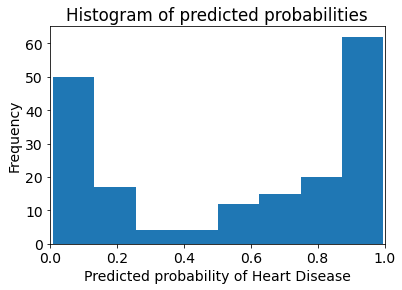

In [ ]:
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Heart Disease')
plt.ylabel ('Frequency')

Decrease the threshold for prediction Heart Disease to increase the sensitivty of the classifier. Classifier is more sensitive to posistive instances

In [ ]:
from sklearn.preprocessing import binarize

# A 2D array is returned by the binarize function. We just want class 1 so we
# slice it our using the index [0]
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [ ]:
cm #original
#TN | FP
#FN | TP
# sensitivity TP / (TP + FN) = 95/102 = .931373
# specificity TN/(TN+FP) = 68/82 = .829268

array([[68, 14],
       [ 7, 95]])

In [ ]:
cm_new = confusion_matrix(y_test, y_pred_class)
cm_new
#TN | FP
#FN | TP
#sensitivity = TP/(TP + FN) = 95/102 = .93
#specificity = TN/(TN+FP) = 61/82 = .74

array([[61, 21],
       [ 7, 95]])

In [ ]:
y_pred_class = binarize([y_pred_prob], threshold=0.6)[0]
cm_new2 = confusion_matrix(y_test, y_pred_class)
cm_new2
#TN | FP
#FN | TP
#sensitivity = TP/(TP + FN) = 92/102 = .90
#specificity = TN/(TN+FP) = 73/82 = .89

array([[73,  9],
       [10, 92]])

The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve:
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

**RocCurveDisplay**

0.9300573888091822


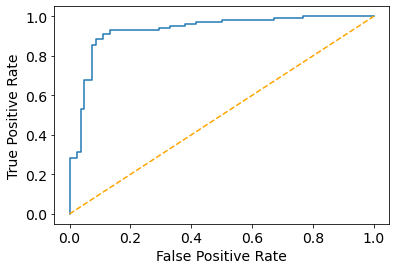

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = clf.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
print(roc_auc)

ROC curves typically feature true positive rate (Sensitivity; recall; probability of detection) on the Y axis, and false positive rate (1-Specificity; the probability of false alarm) on the X axis, for all possible classificaton thresholds ranging from 0 to 1. This is the advantage: ROC curve visualizes all possible classification thresholds. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate. ROC curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=area%20under%20curve

The following is courtesy of Data School's https://www.youtube.com/watch?v=OAl6eAyP-yo
True Positive Rate = true positives / all positives
When the actual classification is positive (Heart Disease in this case), how often does the classifier predict positive? Range [0, 1]

False Positive Rate = false positives / all negatives
When the actual classification is negative (no Heart Disease in this case), how often does the classifier incorrectly predict positive? Range [0, 1]

ROC curves are useful even if your predicted probabilities are not properly calibrated from 0 to 1. What matters is how well the classifier separated the two classes. AUC represents the the probability that a classifier will rank a randomly choesn positive observation higher than a randomly chosen negative observation; AUC is a useful metric even when classes are highly unbalanced.

ROC curves can be extended to problems with three or more classes using a One-Versus-All approach.

Choosing a classification threshold depends on whether you want to minimize FPR or maximize TPR. A low threshhold may result in a lot of False Positives but may be considered desireable if the goal is to collect all true positives and minimize a case where a real instance is misclassified. The ROC curve will help you understand the impact of your choice of threshhold.

Here is a link to understand the ROC curve, pointed out by Data School:
http://www.navan.name/roc/


AUC is useful as a single number summary of the classifier performance. If you randomly choose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation. AUC is useful even when there is a high class imbalance (unlike classification accuracy). https://www.youtube.com/watch?v=85dtiMz9tSo by Data School

In [ ]:
roc_auc_score(y_test, heartdisease_y_pred)

0.8803204208512673

**PrecisionRecallDisplay**

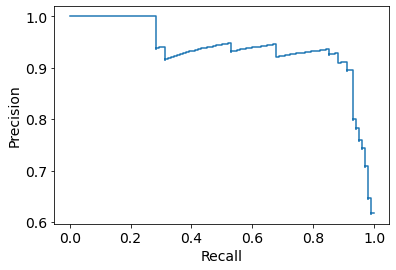

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, **precision** is a measure of result relevancy (**out of all predictions**, how many were correctly classified for the given class; TP/(TP+FP), while **recall** (truth as baseline; **out of all actual positives for the given class**, how many were correctly classified; TP/(TP+FN)) is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision-recall curves are typically used in binary classification to study the output of a classifier.
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

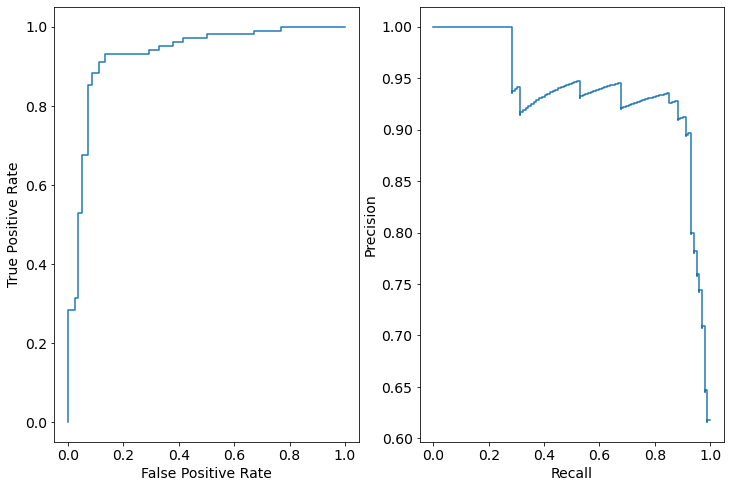

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

**Build a predictive system, courtesy https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan** and https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/

In [ ]:
#array
cols = ['Age', 'Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak' , 'ST_Slope']

# copy/paste just instance values into first array; include parentheses around string
df = pd.DataFrame([[36,'M','NAP',112,340,0,'Normal',184,'N',1,'Flat']], columns = cols)
prediction = clf.predict(df)

print(prediction)

if prediction[0]==0 :
  print('This patient does not have heart disease')
else:
  print('This patient has heart disease')



[0]
This patient does not have heart disease


https://blog.ml.cmu.edu/2020/08/31/2-data-exploration/

https://dfrieds.com/data-analysis/crosstabs-python-pandas.html

https://datagy.io/pandas-crosstab/


https://www.statology.org/frequency-tables-python/

define crosstab
tab = pd.crosstab(index=df['Age'], columns='count')

find proportions
tab/tab.sum()

#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
#https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

I did not explore this further because of my heterogenous datatypes.


https://www.kaggle.com/code/ashishkumarpanda/heart-failure-prediction-beginner-s-approach-to-ml

Rrnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

Random Forests are very handy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection.

Chapter 7